## Imports

In [1]:
from src import data, processing, visualization, modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interactive, fixed

sns.set()

RANDOM_SEED = 2910

%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
data.download_data()

eco2mix-regional-cons-def is already downloaded.
parc-regional-annuel-prod-eolien-solaire is already downloaded.
donnees-synop-essentielles-omm is already downloaded.


In [3]:
production_df, parc_regional_df, meteo_df = data.load_dataframes()

Loading production data...
Loading installed wind power data...
Loading weather reports data...


In [4]:
production_df.head()

,Code INSEE région,Région,Nature,Date,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),...,TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%)
0,84,Auvergne-Rhône-Alpes,Données définitives,2012-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27,Bourgogne-Franche-Comté,Données définitives,2012-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53,Bretagne,Données définitives,2012-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24,Centre-Val de Loire,Données définitives,2012-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,44,Grand Est,Données définitives,2012-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
parc_regional_df.head()

,Année,Code INSEE région,Région,Parc installé éolien (MW),Parc installé solaire (MW),Géo-shape région,Géo-point région,Date
0,2001,84,Auvergne-Rhône-Alpes,3.0,NaN,"{""coordinates"": [[[[2.281089687, 46.420473176]...","45.514642251,4.536120089",2001-12-31 00:00:00+00:00
1,2001,27,Bourgogne-Franche-Comté,NaN,NaN,"{""coordinates"": [[[[2.936623684, 48.163455797]...","47.234282007,4.80685684",2001-12-31 00:00:00+00:00
2,2001,53,Bretagne,10.0,NaN,"{""coordinates"": [[[[-3.427415232, 47.641033313...","48.177553833,-2.841491226",2001-12-31 00:00:00+00:00
3,2001,24,Centre-Val de Loire,NaN,NaN,"{""coordinates"": [[[[1.501397407, 48.941034037]...","47.484775714,1.68439107",2001-12-31 00:00:00+00:00
4,2001,94,Corse,12.0,NaN,"{""coordinates"": [[[[8.6794044, 42.467320898], ...","42.151504476,9.106154758",2001-12-31 00:00:00+00:00


In [6]:
meteo_df.head()

,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,...,Altitude,communes (name),communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code),mois_de_l_annee
0,07005,2010-01-01 00:00:00+00:00,99760.0,10.0,3.0,20.0,6.2,273.65,271.05,83.0,...,69,Abbeville,80001,CA de la Baie de Somme,200070993,Somme,80,Hauts-de-France,32,1
1,07015,2010-01-01 00:00:00+00:00,99700.0,20.0,1.0,40.0,5.7,273.35,271.15,85.0,...,47,Fretin,59256,Métropole Européenne de Lille,245900410,Nord,59,Hauts-de-France,32,1
2,07020,2010-01-01 00:00:00+00:00,99870.0,50.0,1.0,40.0,13.4,278.75,275.55,80.0,...,6,La Hague,50041,CA du Cotentin,200067205,Manche,50,Normandie,28,1
3,07027,2010-01-01 00:00:00+00:00,99720.0,10.0,0.0,80.0,4.6,276.15,273.25,81.0,...,67,Carpiquet,14137,CU Caen la Mer,200065597,Calvados,14,Normandie,28,1
4,07037,2010-01-01 00:00:00+00:00,99680.0,30.0,0.0,40.0,5.7,273.45,271.05,84.0,...,151,Boos,76116,Métropole Rouen Normandie,200023414,Seine-Maritime,76,Normandie,28,1


## Exploration des données

### Evolution du parc installé

On peut enlever la Corse qui apparait dans le parc régional installé, mais pas dans les relevé de production :

In [7]:
print(
    f"Régions comprises dans les données du parc éolien :\n{list(parc_regional_df['Région'].unique())}"
)
print(
    f"\nRégions comprises dans les données de production énergétique :\n{list(production_df['Région'].unique())}"
)
print(
    f"""\nParc éolien de la Corse à fin 2022 : {parc_regional_df.query('Région == "Corse" and Année == 2022')['Parc installé éolien (MW)'].values[0]} MW"""
)

Régions comprises dans les données du parc éolien :
['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne', 'Centre-Val de Loire', 'Corse', 'Grand Est', 'Hauts-de-France', 'Normandie', 'Nouvelle-Aquitaine', 'Occitanie', 'Pays de la Loire', "Provence-Alpes-Côte d'Azur", 'Île-de-France']

Régions comprises dans les données de production énergétique :
['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne', 'Centre-Val de Loire', 'Grand Est', 'Hauts-de-France', 'Normandie', 'Nouvelle-Aquitaine', 'Occitanie', 'Pays de la Loire', "Provence-Alpes-Côte d'Azur", 'Île-de-France']

Parc éolien de la Corse à fin 2022 : 18.0 MW


In [8]:
parc_regional_df["Région"] = parc_regional_df["Région"].cat.remove_categories(["Corse"])

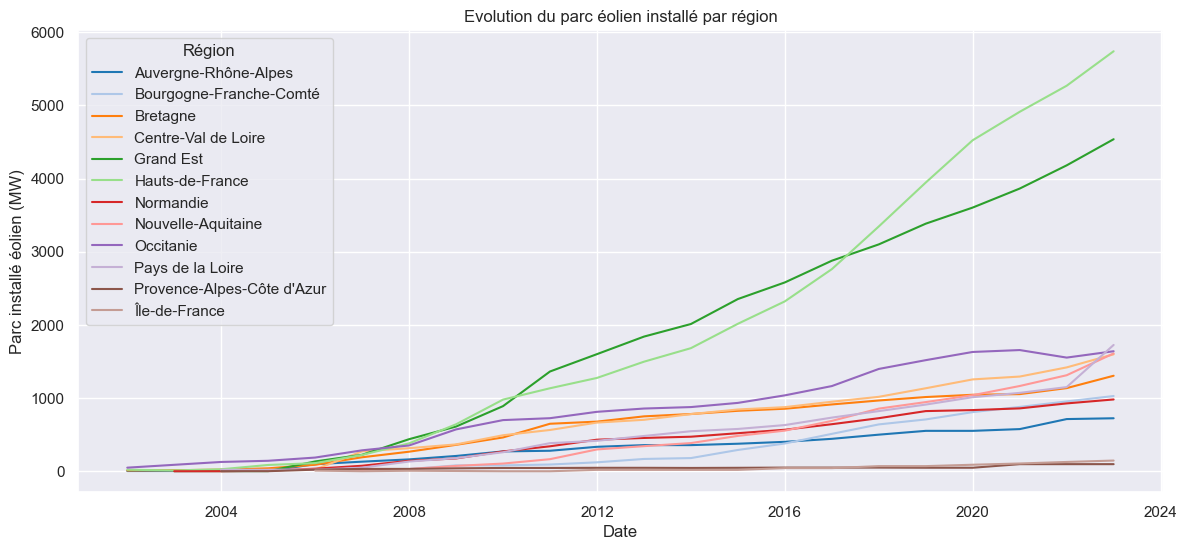

In [9]:
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=parc_regional_df,
    x="Date",
    y="Parc installé éolien (MW)",
    hue="Région",
    palette="tab20",
)
plt.title("Evolution du parc éolien installé par région")
plt.show()

### Production d'énergie éolienne

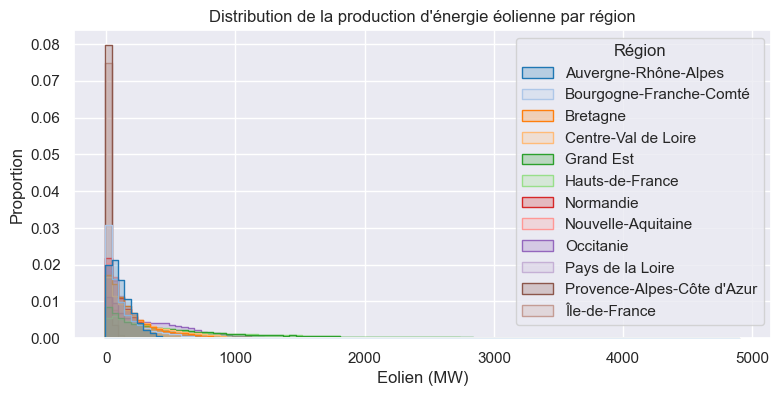

In [10]:
plt.figure(figsize=(9, 4))
sns.histplot(
    production_df,
    x="Eolien (MW)",
    stat="proportion",
    element="step",
    hue="Région",
    palette="tab20",
    bins=100,
)
plt.title("Distribution de la production d'énergie éolienne par région")
plt.show()

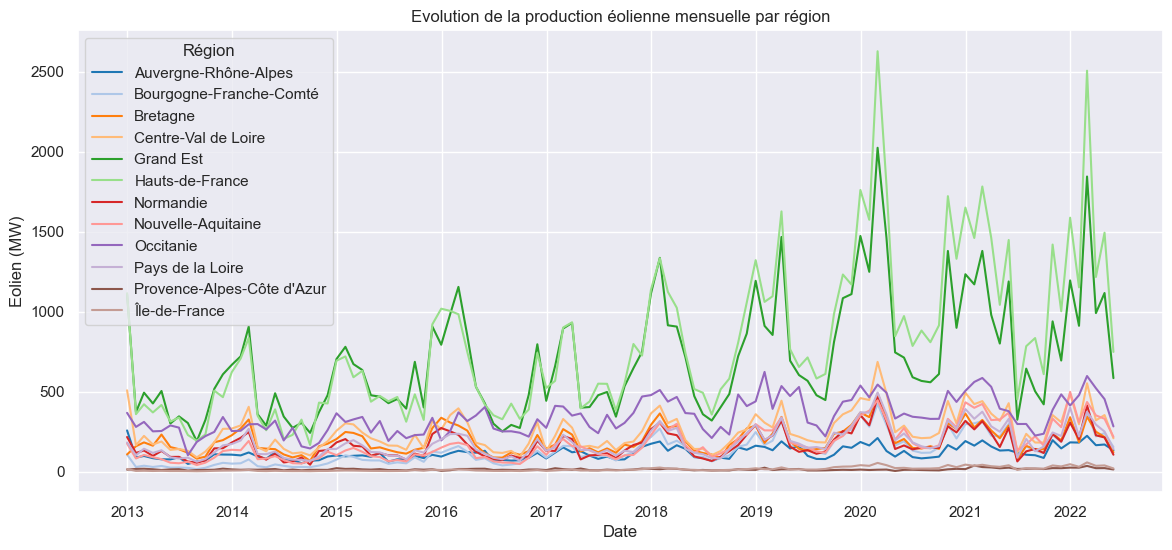

In [11]:
monthy_production_df = (
    production_df.set_index("Date")
    .groupby("Région")["Eolien (MW)"]
    .resample("M")
    .mean()
    .reset_index()
)

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=monthy_production_df, x="Date", y="Eolien (MW)", hue="Région", palette="tab20"
)
plt.title("Evolution de la production éolienne mensuelle par région")
plt.show()

### Normalisation de la production vis-à-vis du parc installé

In [39]:
production_df["TCH Eolien (%)"].isna().sum() / len(production_df)

0.743455497382199

In [12]:
production_df = processing.normalize_production(production_df, parc_regional_df)

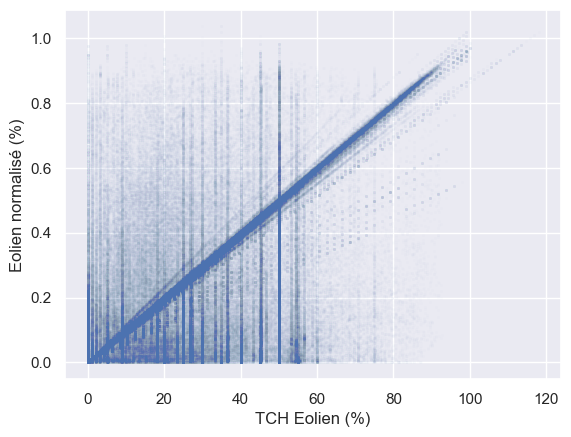

In [41]:
sns.scatterplot(
    production_df, x="TCH Eolien (%)", y="Eolien normalisé (%)", s=5, alpha=0.01
)
plt.show()

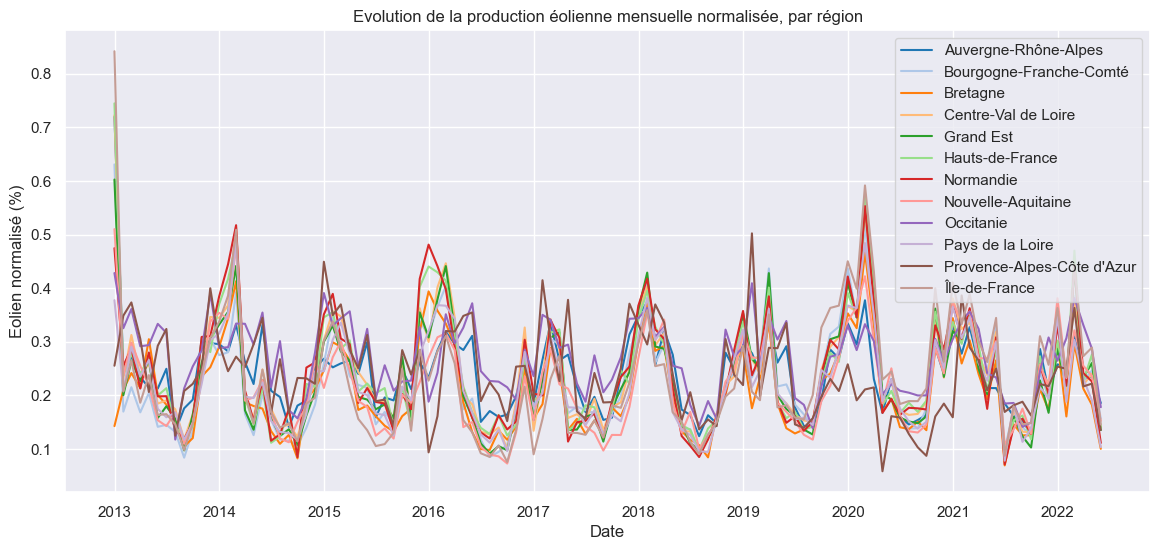

In [13]:
monthy_normalized_production_df = (
    production_df.set_index("Date")
    .groupby("Région")["Eolien normalisé (%)"]
    .resample("M")
    .mean()
    .reset_index()
)

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=monthy_normalized_production_df,
    x="Date",
    y="Eolien normalisé (%)",
    hue="Région",
    palette="tab20",
)
plt.legend(loc="upper right")
plt.title("Evolution de la production éolienne mensuelle normalisée, par région")
plt.show()

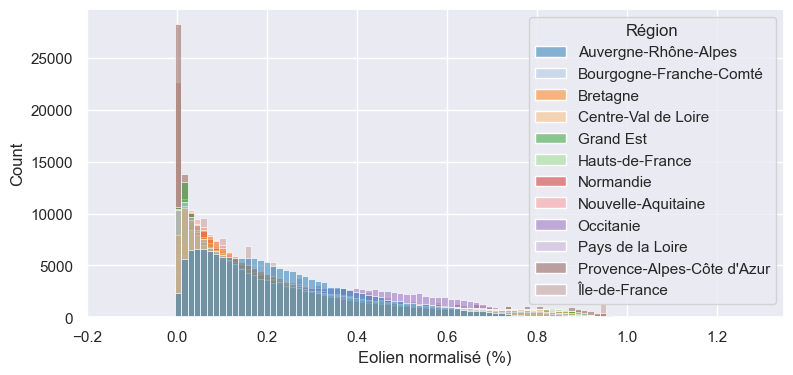

In [14]:
plt.figure(figsize=(9, 4))
sns.histplot(
    production_df, x="Eolien normalisé (%)", hue="Région", palette="tab20", bins=100
)
plt.show()

### Relation entre production d'énergie éolienne et paramètres météo

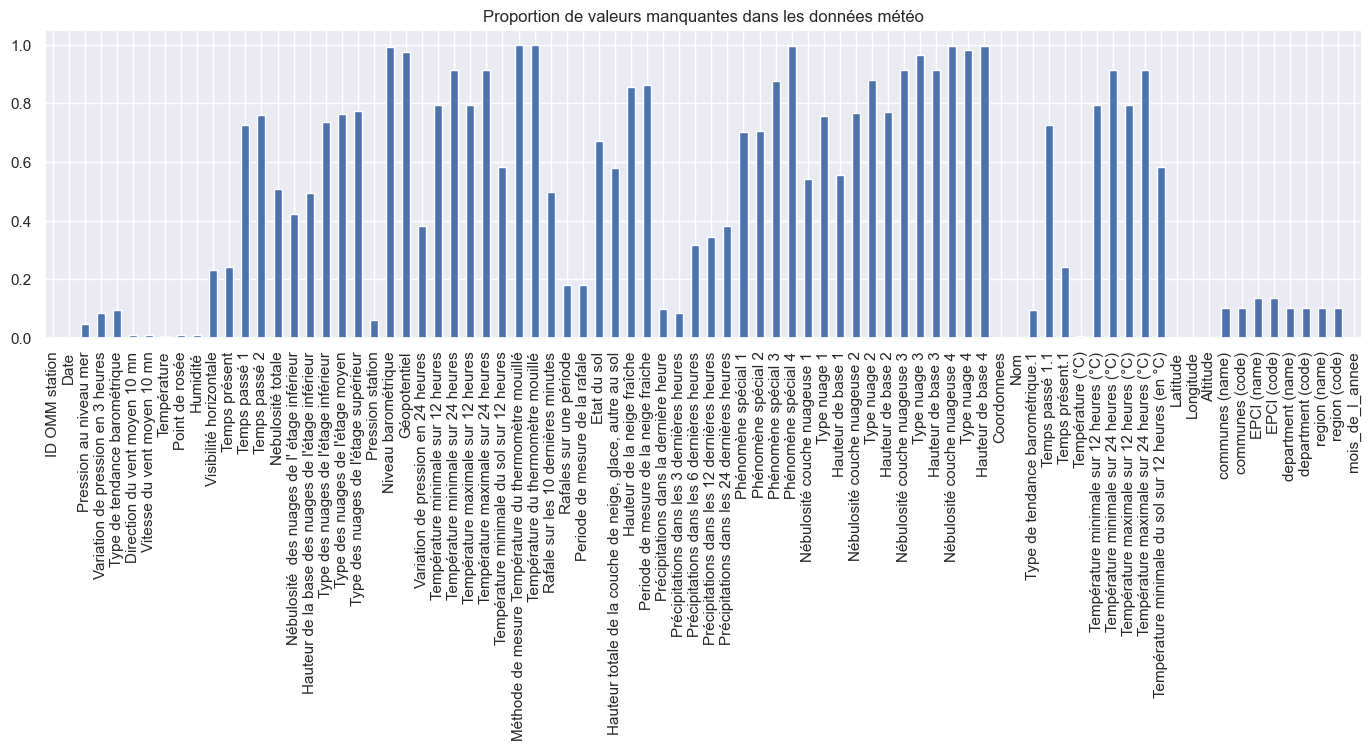

In [15]:
plt.figure(figsize=(17, 4))
(meteo_df.isna().sum() / len(meteo_df)).plot.bar()
plt.title("Proportion de valeurs manquantes dans les données météo")
plt.show()

In [16]:
meteo_df = processing.compute_wind_direction_features(meteo_df)

In [17]:
meteo_agg_df = processing.compute_weather_aggregations(meteo_df)

In [18]:
production_df = pd.merge(
    production_df,
    meteo_agg_df,
    left_on=["Date", "Région"],
    right_on=["Date", "region (name)"],
)

In [19]:
features = [
    "Pression au niveau mer",
    "Sinus direction du vent moyen 10 mn",
    "Cosinus direction du vent moyen 10 mn",
    "Vitesse du vent moyen 10 mn",
    "Température",
    "Point de rosée",
    "Humidité",
    "Pression station",
    "Rafales sur une période",
    "Précipitations dans la dernière heure",
]

target = "Eolien normalisé (%)"

In [21]:
production_df = production_df[production_df[features + [target]].notna().all(axis=1)]

In [73]:
interactive(
    visualization.plot_facet_scatter,
    production_df=fixed(production_df),
    variable=sorted(features),
    n_samples=fixed(10000),
    random_state=fixed(RANDOM_SEED),
)

interactive(children=(Dropdown(description='variable', options=('Cosinus direction du vent moyen 10 mn', 'Humi…

## Modélisation

In [22]:
date_split = "2020-01-01"

X_train = production_df.set_index("Date", drop=True).loc[:date_split, features]
X_test = production_df.set_index("Date", drop=True).loc[date_split:, features]
y_train = production_df.set_index("Date", drop=True).loc[:date_split, target]
y_test = production_df.set_index("Date", drop=True).loc[
    date_split:, ["Région", "Eolien (MW)", "Parc installé éolien (MW)", target]
]

In [23]:
pipelines = modeling.build_ml_pipelines(RANDOM_SEED)

In [24]:
pipelines, metrics_df, y_pred = modeling.train_and_evaluate_models(
    pipelines, X_train, X_test, y_train, y_test
)

Training linear regression...
Training KNN...
Training histogram gradient boosting...


In [25]:
metrics_df

,MAE,R2
linear regression,149.681604,0.805239
KNN,128.784489,0.842219
histogram gradient boosting,120.312534,0.846352


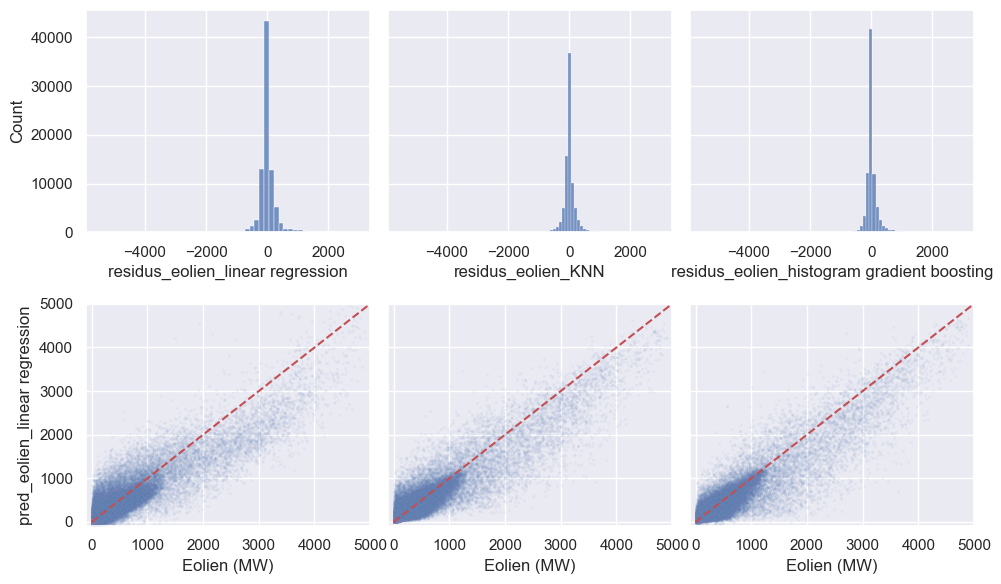

In [26]:
_, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6), sharey="row", sharex="row")

for i, model in enumerate(pipelines.keys()):
    sns.histplot(y_pred, x=f"residus_eolien_{model}", bins=50, ax=axs[0, i])
    sns.scatterplot(
        y_pred, x="Eolien (MW)", y=f"pred_eolien_{model}", s=5, alpha=0.05, ax=axs[1, i]
    )
    axs[1, i].set_xlim(-100, 5000)
    axs[1, i].set_ylim(-100, 5000)
    axs[1, i].plot((0, 5000), (0, 5000), c="r", linestyle="--")

plt.tight_layout()

In [27]:
weekly_y_pred = (
    y_pred.groupby("Région")[["Eolien (MW)", "pred_eolien_histogram gradient boosting"]]
    .resample("W")
    .mean()
    .reset_index()
)

/home/antonin/.pyenv/versions/3.9.17/envs/prediction-energie-eolienne-venv/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/antonin/.pyenv/versions/3.9.17/envs/prediction-energie-eolienne-venv/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


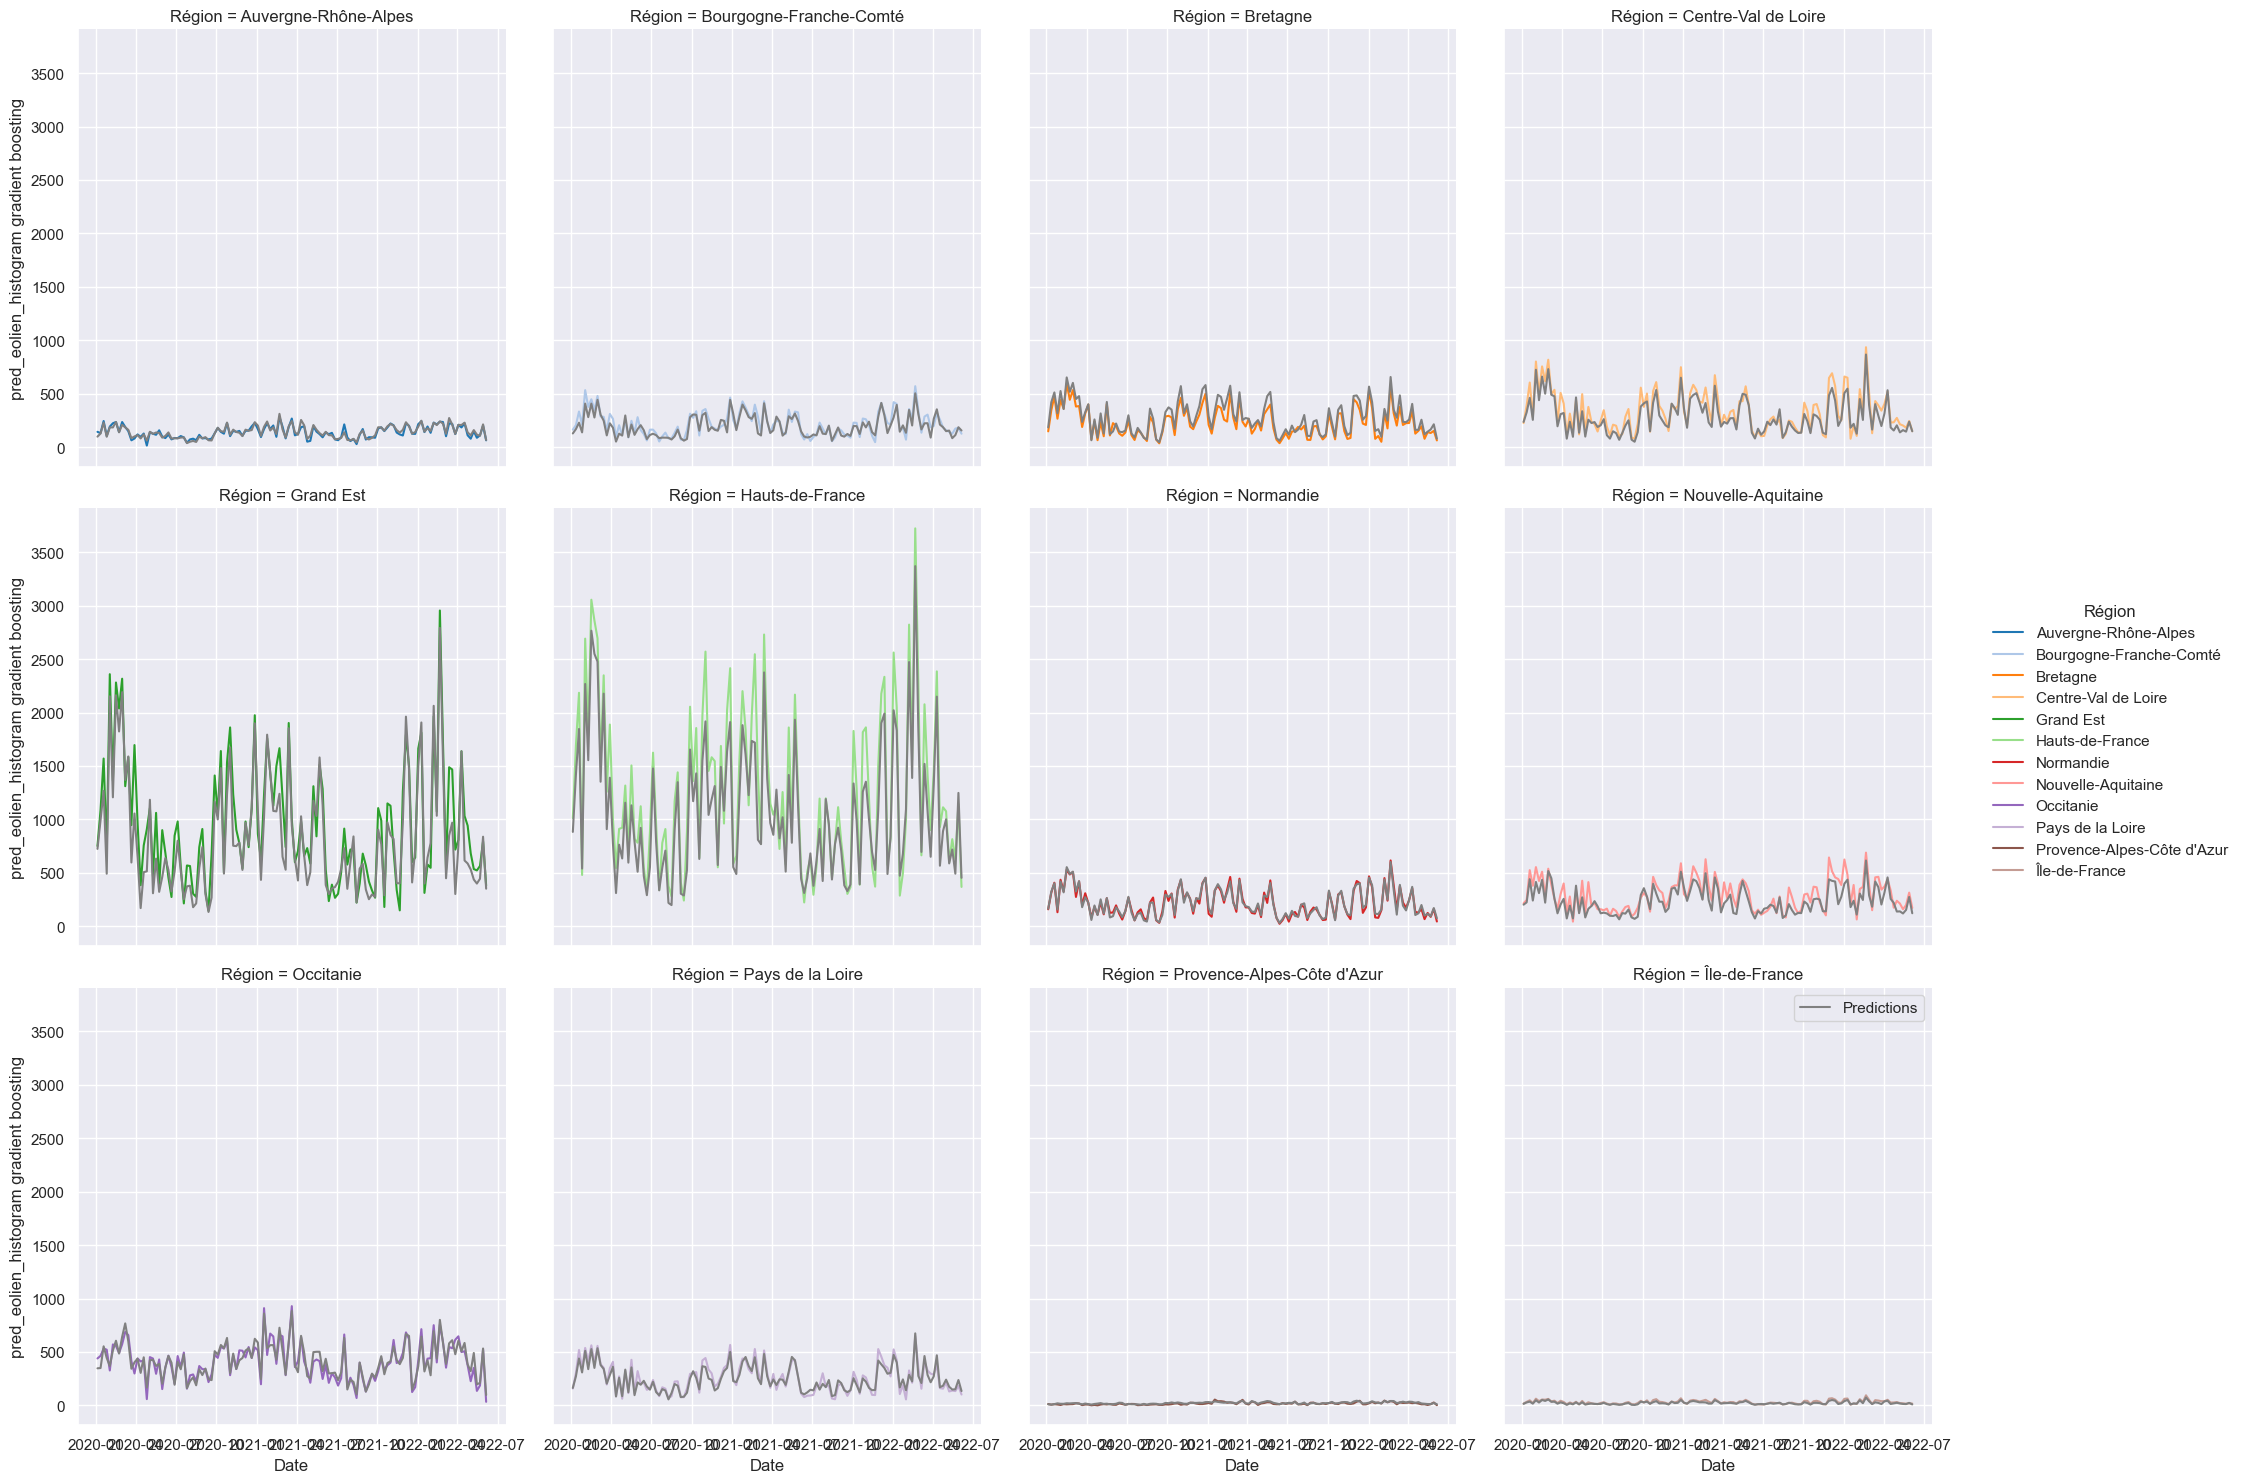

In [28]:
g = sns.relplot(
    data=weekly_y_pred,
    kind="line",
    col="Région",
    hue="Région",
    palette="tab20",
    col_wrap=4,
    x="Date",
    y="Eolien (MW)",
)
g.data = weekly_y_pred.reset_index()
g.map(
    sns.lineplot,
    "Date",
    "pred_eolien_histogram gradient boosting",
    color="grey",
    label="Predictions",
    # linestyle="--",
)
plt.legend()
plt.show()

## Prédictions sur 2023

In [29]:
meteo_2023_df = meteo_df[
    (meteo_df["Date"] >= "2023-01-01")
    & (meteo_df["region (name)"].isin(production_df["Région"].unique()))
]
pred_2023_df = meteo_2023_df[["Date", "region (name)"]].copy()

In [30]:
meteo_2023_df

,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,...,communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code),mois_de_l_annee,Sinus direction du vent moyen 10 mn,Cosinus direction du vent moyen 10 mn
2193040,07005,2023-01-01 00:00:00+00:00,100970.0,120.0,3.0,190.0,3.2,286.55,280.55,67.0,...,80001,CA de la Baie de Somme,200070993,Somme,80,Hauts-de-France,32,1,-0.173648,-9.848078e-01
2193041,07015,2023-01-01 00:00:00+00:00,100970.0,100.0,1.0,200.0,8.6,287.15,279.75,61.0,...,59256,Métropole Européenne de Lille,200093201,Nord,59,Hauts-de-France,32,1,-0.342020,-9.396926e-01
2193042,07020,2023-01-01 00:00:00+00:00,100760.0,320.0,2.0,230.0,12.0,284.95,282.15,83.0,...,50041,CA du Cotentin,200067205,Manche,50,Normandie,28,1,-0.766044,-6.427876e-01
2193043,07027,2023-01-01 00:00:00+00:00,100970.0,90.0,3.0,220.0,11.5,287.55,282.95,74.0,...,14137,CU Caen la Mer,200065597,Calvados,14,Normandie,28,1,-0.642788,-7.660444e-01
2193044,07037,2023-01-01 00:00:00+00:00,101100.0,50.0,0.0,200.0,9.3,286.65,279.55,62.0,...,76116,Métropole Rouen Normandie,200023414,Seine-Maritime,76,Normandie,28,1,-0.342020,-9.396926e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307044,07643,2023-08-25 18:00:00+00:00,101170.0,10.0,3.0,260.0,6.5,304.75,290.65,43.0,...,34154,CA du Pays de l'Or,243400470,Hérault,34,Occitanie,76,8,-0.984808,-1.736482e-01
2307045,07650,2023-08-25 18:00:00+00:00,101300.0,10.0,3.0,210.0,4.6,301.25,296.65,76.0,...,13054,Métropole d'Aix-Marseille-Provence,200054807,Bouches-du-Rhône,13,Provence-Alpes-Côte d'Azur,93,8,-0.500000,-8.660254e-01
2307046,07661,2023-08-25 18:00:00+00:00,NaN,NaN,NaN,300.0,4.3,NaN,NaN,NaN,...,83153,Métropole Toulon-Provence-Méditerranée,248300543,Var,83,Provence-Alpes-Côte d'Azur,93,8,-0.866025,5.000000e-01
2307047,07690,2023-08-25 18:00:00+00:00,101220.0,-60.0,5.0,90.0,1.0,301.35,297.35,79.0,...,06088,Métropole Nice Côte d'Azur,200030195,Alpes-Maritimes,06,Provence-Alpes-Côte d'Azur,93,8,1.000000,6.123234e-17


In [32]:
best_model = pipelines["histogram gradient boosting"]
pred_2023_df["Prédictions normalisées"] = best_model.predict(meteo_2023_df[features])

In [33]:
pred_2023_df = pd.merge(
    pred_2023_df,
    parc_regional_df.query("Année == 2022")[["Région", "Parc installé éolien (MW)"]],
    left_on="region (name)",
    right_on="Région",
)

In [34]:
pred_2023_df

,Date,region (name),Prédictions normalisées,Région,Parc installé éolien (MW)
0,2023-01-01 00:00:00+00:00,Hauts-de-France,0.214915,Hauts-de-France,5739.0
1,2023-01-01 00:00:00+00:00,Hauts-de-France,0.722548,Hauts-de-France,5739.0
2,2023-01-01 03:00:00+00:00,Hauts-de-France,0.299373,Hauts-de-France,5739.0
3,2023-01-01 03:00:00+00:00,Hauts-de-France,0.647994,Hauts-de-France,5739.0
4,2023-01-01 06:00:00+00:00,Hauts-de-France,0.264125,Hauts-de-France,5739.0
...,...,...,...,...,...
74745,2023-08-25 15:00:00+00:00,Provence-Alpes-Côte d'Azur,0.054029,Provence-Alpes-Côte d'Azur,97.0
74746,2023-08-25 18:00:00+00:00,Provence-Alpes-Côte d'Azur,0.085635,Provence-Alpes-Côte d'Azur,97.0
74747,2023-08-25 18:00:00+00:00,Provence-Alpes-Côte d'Azur,0.201514,Provence-Alpes-Côte d'Azur,97.0
74748,2023-08-25 18:00:00+00:00,Provence-Alpes-Côte d'Azur,0.169092,Provence-Alpes-Côte d'Azur,97.0


In [36]:
pred_2023_df["Prédiction eolien (MW)"] = (
    pred_2023_df["Prédictions normalisées"] * pred_2023_df["Parc installé éolien (MW)"]
)
weekly_pred_2023_df = (
    pred_2023_df.set_index("Date")
    .groupby("Région")["Prédiction eolien (MW)"]
    .resample("W")
    .mean()
    .reset_index()
)

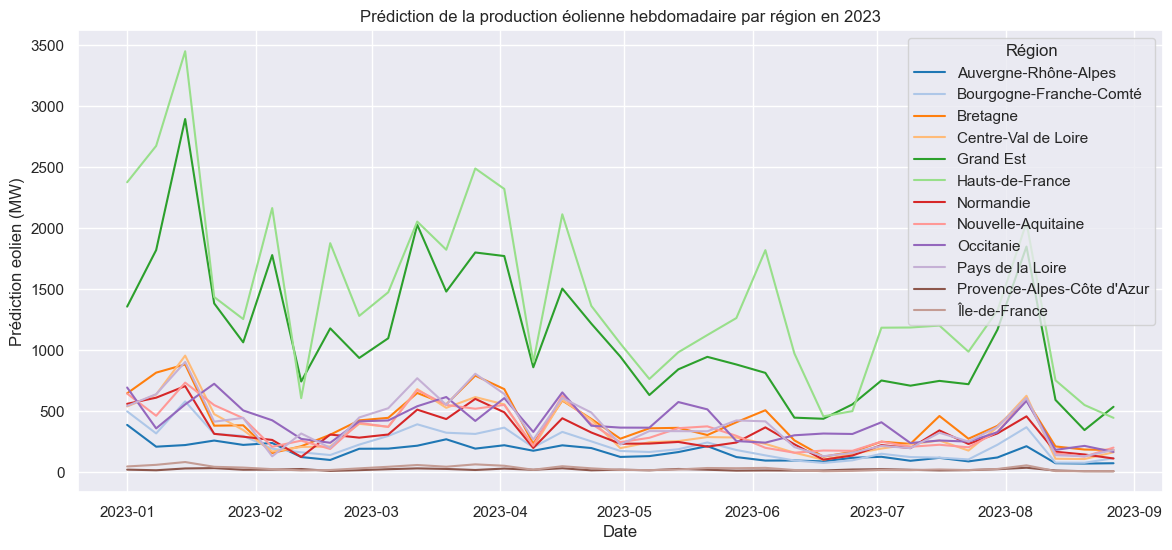

In [37]:
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=weekly_pred_2023_df,
    x="Date",
    y="Prédiction eolien (MW)",
    hue="Région",
    palette="tab20",
)
plt.title("Prédiction de la production éolienne hebdomadaire par région en 2023")
plt.show()